# Chapter 4: NumPy Basics: Arrays and Vectorized Computation

In [1]:
import numpy as np

## Dataset:80 Cereals - Nutrition data on 80cereal products

The data file can be downloaded from [Kaggle.com](https://www.kaggle.com/crawford/80-cereals)

>If you like to eat cereal, do yourself a favor and avoid this dataset at all costs. After seeing these data it will never be the same for me to eat Fruity Pebbles again. - Kaggle

- Download the zip file from Kaggle (login required)
- Unzip to get `cereal.csv` file
- Move the csv file to a proper folder
- Open the csv file using notepad and excel to examine its content

In [2]:
import os
print("My current working directory:", os.getcwd())
print("Make sure the csv file exists:", os.listdir('../../Data/cereals'))
# my cereal file can be accessed as "Data/cereals/cereal.csv"

My current working directory: C:\Users\abdul\OneDrive\Desktop\Fall2019\CMP 464 - Data Analysis\data-analysis\Classwork
Make sure the csv file exists: ['cereal.csv']


In [3]:
# Load the csv file with np.loadtxt()
# Spoiler alert: in the next chapter we will learn a more user-friendly
# way of loading data.

# How to use np.loadtxt()?
# ?np.loadtxt() # Display documentation
# ??np.loadtxt() # Display source code

In [4]:
# Try an example from documentation
from io import StringIO 
c = StringIO(u"0 1\n2 3")
np.loadtxt(c)

array([[0., 1.],
       [2., 3.]])

In [5]:
# Load cereal.csv as a numpy array named raw_data
raw_data = np.loadtxt("../../Data/cereals/cereal.csv",
                      dtype=str,
                      delimiter=",")
print(raw_data[0, :])

['name' 'mfr' 'type' 'calories' 'protein' 'fat' 'sodium' 'fiber' 'carbo'
 'sugars' 'potass' 'vitamins' 'shelf' 'weight' 'cups' 'rating']


In [6]:
# What is the shape of raw_data?
print("Shape:", raw_data.shape)

Shape: (78, 16)


In [7]:
# Create a list of feature names (call it feature_names)
feature_names = raw_data[0, :]
# print("Feature names:", raw_data[0, :])

# Print a list in a nicer format:
# Create a string that joins all values from the array
feature_string = ", ".join(feature_names)
print(feature_string)

name, mfr, type, calories, protein, fat, sodium, fiber, carbo, sugars, potass, vitamins, shelf, weight, cups, rating


In [8]:
# Assign the rest to data
data = raw_data[1:, :]

# Print the shape of data
print("Shape of data:", data.shape)

Shape of data: (77, 16)


### Content
What are the features?

- Name: Name of cereal
- mfr: Manufacturer of cereal
    - A = American Home Food Products;
    - G = General Mills
    - K = Kelloggs
    - N = Nabisco
    - P = Post
    - Q = Quaker Oats
    - R = Ralston Purina
- type:
    - cold
    - hot
- calories: calories per serving
- protein: grams of protein
- fat: grams of fat
- sodium: milligrams of sodium
- fiber: grams of dietary fiber
- carbo: grams of complex carbohydrates
- sugars: grams of sugars
- potass: milligrams of potassium
- vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended
- shelf: display shelf (1, 2, or 3, counting from the floor)
- weight: weight in ounces of one serving
- cups: number of cups in one serving
- rating: a rating of the cereals (Possibly from Consumer Reports?)

Next, let's examine some important features

In [9]:
# ---------Names------------
# Display the list of cereal names
print("\n".join(data[:, 0]))

100% Bran
100% Natural Bran
All-Bran
All-Bran with Extra Fiber
Almond Delight
Apple Cinnamon Cheerios
Apple Jacks
Basic 4
Bran Chex
Bran Flakes
Cap'n'Crunch
Cheerios
Cinnamon Toast Crunch
Clusters
Cocoa Puffs
Corn Chex
Corn Flakes
Corn Pops
Count Chocula
Cracklin' Oat Bran
Cream of Wheat (Quick)
Crispix
Crispy Wheat & Raisins
Double Chex
Froot Loops
Frosted Flakes
Frosted Mini-Wheats
Fruit & Fibre Dates; Walnuts; and Oats
Fruitful Bran
Fruity Pebbles
Golden Crisp
Golden Grahams
Grape Nuts Flakes
Grape-Nuts
Great Grains Pecan
Honey Graham Ohs
Honey Nut Cheerios
Honey-comb
Just Right Crunchy  Nuggets
Just Right Fruit & Nut
Kix
Life
Lucky Charms
Maypo
Muesli Raisins; Dates; & Almonds
Muesli Raisins; Peaches; & Pecans
Mueslix Crispy Blend
Multi-Grain Cheerios
Nut&Honey Crunch
Nutri-Grain Almond-Raisin
Nutri-grain Wheat
Oatmeal Raisin Crisp
Post Nat. Raisin Bran
Product 19
Puffed Rice
Puffed Wheat
Quaker Oat Squares
Quaker Oatmeal
Raisin Bran
Raisin Nut Bran
Raisin Squares
Rice Chex
Rice Kr

In [10]:
# How to sort an numpy array?
ary = np.array([1, 3, 2, 7, 5])
print(ary)
# ary = np.sort(ary)
ary.sort()
print(ary)

[1 3 2 7 5]
[1 2 3 5 7]


In [11]:
matrix = np.array([[1, 4, 23, 19], 
                   [5, 2, 6, -20]])
print(matrix)
print("sorting each row:")
print(np.sort(matrix, axis=1)) # or: np.sort(matrix)
print("sorting each column:")
print(np.sort(matrix, axis=0))

[[  1   4  23  19]
 [  5   2   6 -20]]
sorting each row:
[[  1   4  19  23]
 [-20   2   5   6]]
sorting each column:
[[  1   2   6 -20]
 [  5   4  23  19]]


In [12]:
# The names are nicely sorted. How to sort an array?

# To make an example, let's shuffle the array first
name_data = np.array(data[:, 0])
example = np.array(name_data)
np.random.shuffle(example)
print("\n".join(example))

Grape Nuts Flakes
Shredded Wheat 'n'Bran
Wheaties
Trix
Rice Chex
Puffed Wheat
Post Nat. Raisin Bran
Triples
Frosted Mini-Wheats
Shredded Wheat
Puffed Rice
Golden Grahams
Great Grains Pecan
Kix
Honey Nut Cheerios
Wheaties Honey Gold
Apple Jacks
Golden Crisp
Cap'n'Crunch
Rice Krispies
Fruity Pebbles
Double Chex
Basic 4
Honey Graham Ohs
Corn Chex
Bran Flakes
Froot Loops
Mueslix Crispy Blend
Smacks
Cream of Wheat (Quick)
Muesli Raisins; Peaches; & Pecans
Fruit & Fibre Dates; Walnuts; and Oats
Corn Pops
100% Natural Bran
Count Chocula
Total Raisin Bran
All-Bran with Extra Fiber
Cheerios
Lucky Charms
Cocoa Puffs
Nutri-Grain Almond-Raisin
Total Whole Grain
Shredded Wheat spoon size
Special K
Strawberry Fruit Wheats
Just Right Crunchy  Nuggets
Almond Delight
Crispix
Cinnamon Toast Crunch
Quaker Oat Squares
Product 19
100% Bran
Grape-Nuts
Raisin Bran
Raisin Squares
Total Corn Flakes
Apple Cinnamon Cheerios
Frosted Flakes
Clusters
Wheat Chex
Nut&Honey Crunch
Muesli Raisins; Dates; & Almonds
Quak

In [13]:
# Now use sort() to sort the array
# print(np.sort(example)) # this creates a new sorted list
example.sort()
print(example)# this will sort the list itself

['100% Bran' '100% Natural Bran' 'All-Bran' 'All-Bran with Extra Fiber'
 'Almond Delight' 'Apple Cinnamon Cheerios' 'Apple Jacks' 'Basic 4'
 'Bran Chex' 'Bran Flakes' "Cap'n'Crunch" 'Cheerios'
 'Cinnamon Toast Crunch' 'Clusters' 'Cocoa Puffs' 'Corn Chex'
 'Corn Flakes' 'Corn Pops' 'Count Chocula' "Cracklin' Oat Bran"
 'Cream of Wheat (Quick)' 'Crispix' 'Crispy Wheat & Raisins' 'Double Chex'
 'Froot Loops' 'Frosted Flakes' 'Frosted Mini-Wheats'
 'Fruit & Fibre Dates; Walnuts; and Oats' 'Fruitful Bran' 'Fruity Pebbles'
 'Golden Crisp' 'Golden Grahams' 'Grape Nuts Flakes' 'Grape-Nuts'
 'Great Grains Pecan' 'Honey Graham Ohs' 'Honey Nut Cheerios' 'Honey-comb'
 'Just Right Crunchy  Nuggets' 'Just Right Fruit & Nut' 'Kix' 'Life'
 'Lucky Charms' 'Maypo' 'Muesli Raisins; Dates; & Almonds'
 'Muesli Raisins; Peaches; & Pecans' 'Mueslix Crispy Blend'
 'Multi-Grain Cheerios' 'Nut&Honey Crunch' 'Nutri-Grain Almond-Raisin'
 'Nutri-grain Wheat' 'Oatmeal Raisin Crisp' 'Post Nat. Raisin Bran'
 'Product

In [14]:
feature_names

array(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium',
       'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'shelf',
       'weight', 'cups', 'rating'], dtype='<U38')

In [15]:
my_data = np.array([[1, 2, 13],
                    [4, 5, 6],
                    [7, 8, 9]])
last_col = np.array(my_data[:, 2]) # this creates a new copy of last column
last_col = my_data[:, 2] # this simply refers to the last column of my_data
last_col.sort()
print(last_col)
print(my_data)

[ 6  9 13]
[[ 1  2  6]
 [ 4  5  9]
 [ 7  8 13]]


In [16]:
# ------------- ratings ------------
# What is the index of rating in feature_names?
print(np.where(feature_names == "rating"))
rating_data = np.array(data[:, 15]) # create a new numpy array with ratings
# print(rating_data)
# print(rating_data.dtype)
# change the data type from string to float
rating_data = rating_data.astype(float)
print(rating_data)
# rating_data_int = rating_data.astype(int)
# print(rating_data_int)

(array([15], dtype=int64),)
[68.402973 33.983679 59.425505 93.704912 34.384843 29.509541 33.174094
 37.038562 49.120253 53.313813 18.042851 50.764999 19.823573 40.400208
 22.736446 41.445019 45.863324 35.782791 22.396513 40.448772 64.533816
 46.895644 36.176196 44.330856 32.207582 31.435973 58.345141 40.917047
 41.015492 28.025765 35.252444 23.804043 52.076897 53.371007 45.811716
 21.871292 31.072217 28.742414 36.523683 36.471512 39.241114 45.328074
 26.734515 54.850917 37.136863 34.139765 30.313351 40.105965 29.924285
 40.69232  59.642837 30.450843 37.840594 41.50354  60.756112 63.005645
 49.511874 50.828392 39.259197 39.7034   55.333142 41.998933 40.560159
 68.235885 74.472949 72.801787 31.230054 53.131324 59.363993 38.839746
 28.592785 46.658844 39.106174 27.753301 49.787445 51.592193 36.187559]


In [17]:
# Find the maximum rating
print("maximum rating:", np.max(rating_data))
print("minimum rating:", np.min(rating_data))
print("average rating:", np.mean(rating_data))

# Find the index corresponding to the highest rating
highest_rating = np.max(rating_data)
highest_rating_index = np.where(rating_data == highest_rating)
print(highest_rating_index)
print("Product with highest rating:", data[3, 0])

lowest_rating = np.min(rating_data)
lowest_rating_i = np.where(rating_data == lowest_rating)
print(lowest_rating_i)
print(data[10,0])

maximum rating: 93.704912
minimum rating: 18.042851
average rating: 42.66570498701299
(array([3], dtype=int64),)
Product with highest rating: All-Bran with Extra Fiber
(array([10], dtype=int64),)
Cap'n'Crunch


In [18]:
# sort and argsort()
# arr = np.random.rand(5)
arr = np.array([1, 7, -3, 44, 3])
arr_sorted_indices = arr.argsort()
print(arr_sorted_indices)
# use indices to find the two largest values:
# reverse = arr_sorted_indices[::-1]
# print(reverse)
# arr[reverse[0:2]]
largest_two_indices = arr_sorted_indices[-2:]
print("indices for the two largest values:",
      largest_two_indices)
largest_two_values = arr[largest_two_indices]
print("Two largest values:", largest_two_values)
# # find the second largest value in arr
# print("Second largest:", arr[arr.argsort()[-2]])
# print(arr)

[2 0 4 1 3]
indices for the two largest values: [1 3]
Two largest values: [ 7 44]


In [19]:
arr = np.random.rand(10)
arr_argsort = np.argsort(arr)
print(arr_argsort)
# Find the two smallest values from arr
indices_for_smallest_values = arr_argsort[:2]
print(arr[indices_for_smallest_values])
print(arr)

[0 2 6 4 3 7 8 1 5 9]
[0.16099173 0.22222277]
[0.16099173 0.61322112 0.22222277 0.33627724 0.31142078 0.69129284
 0.25237252 0.43924719 0.59392495 0.84605655]


In [20]:
# Sort the ratings using sort() and argsort()
sorted_rating_indices = np.argsort(rating_data)
print(sorted_rating_indices)

# Find the top five ratings
indices= sorted_rating_indices[-5:]
print(rating_data[indices])
# Find the top five highest-rated cereal products
print(name_data[indices])

# find the top five lowest-rated cereal products

sorted_rating_indices = np.argsort(rating_data)
print(sorted_rating_indices)

# Find the top five ratings
indices= sorted_rating_indices[:5]
print(rating_data[indices])
# Find the top five highest-rated cereal products
print(name_data[indices])


[10 12 35 18 14 31 42 73 29 70 37  5 48 46 51 36 66 25 24  6  1 45  4 30
 17 22 76 39 38  7 44 52 69 72 40 58 59 47 13 19 62 49 27 28 15 53 61 23
 41 34 16 71 21  8 56 74 11 57 75 32 67  9 33 43 60 26 68  2 50 54 55 20
 63  0 65 64  3]
[68.235885 68.402973 72.801787 74.472949 93.704912]
['Shredded Wheat' '100% Bran' 'Shredded Wheat spoon size'
 "Shredded Wheat 'n'Bran" 'All-Bran with Extra Fiber']
[10 12 35 18 14 31 42 73 29 70 37  5 48 46 51 36 66 25 24  6  1 45  4 30
 17 22 76 39 38  7 44 52 69 72 40 58 59 47 13 19 62 49 27 28 15 53 61 23
 41 34 16 71 21  8 56 74 11 57 75 32 67  9 33 43 60 26 68  2 50 54 55 20
 63  0 65 64  3]
[18.042851 19.823573 21.871292 22.396513 22.736446]
["Cap'n'Crunch" 'Cinnamon Toast Crunch' 'Honey Graham Ohs' 'Count Chocula'
 'Cocoa Puffs']


(array([9], dtype=int64),)
sugars data:
[ 6.  8.  5.  0.  8. 10. 14.  8.  6.  5. 12.  1.  9.  7. 13.  3.  2. 12.
 13.  7.  0.  3. 10.  5. 13. 11.  7. 10. 12. 12. 15.  9.  5.  3.  4. 11.
 10. 11.  6.  9.  3.  6. 12.  3. 11. 11. 13.  6.  9.  7.  2. 10. 14.  3.
  0.  0.  6. -1. 12.  8.  6.  2.  3.  0.  0.  0. 15.  3.  5.  3. 14.  3.
  3. 12.  3.  3.  8.]


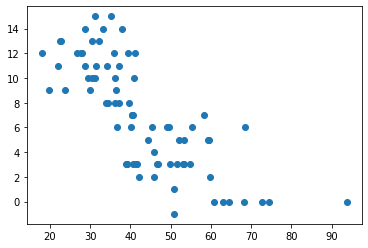

In [21]:
# ------------- sugars -------------
# What is the index of sugars in feature_names?
print(np.where(feature_names == "sugars"))  # Output: 9
sugars_data = data[:, 9].astype(float)
print("sugars data:")
print(sugars_data)

# Is there any correlation between sugars and rating?
import matplotlib.pyplot as plt
%matplotlib inline 
# A "magic" command so that figure is shown in this notebook
plt.plot(rating_data,
         sugars_data,
         marker='o',
         linestyle='')

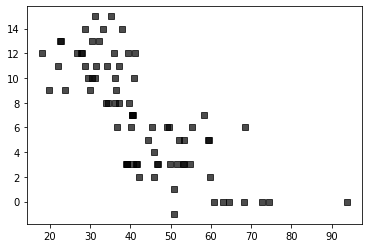

In [22]:
plt.plot(rating_data,
         sugars_data,
         marker='s', # {. o ^ s +}
         c='black', # {b, g, r}
         alpha=0.7, # transparency
         linestyle='')

In [23]:
# ------------- Weight -------------
# What is the index of weight in feature_names?
print(np.where(feature_names == "weight")) # output: 13
weight_data = np.array(data[:, 13]).astype(float)
print(weight_data)

# How many different weights per serving are there?
weight_set = set(weight_data)
print(weight_set)
print("Number of different weights:", len(weight_set))



(array([13], dtype=int64),)
[1.   1.   1.   1.   1.   1.   1.   1.33 1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.25
 1.33 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.3  1.   1.
 1.   1.   1.   1.   1.5  1.   1.   1.33 1.   1.25 1.33 1.   0.5  0.5
 1.   1.   1.33 1.   1.   1.   1.   0.83 1.   1.   1.   1.   1.   1.
 1.5  1.   1.   1.   1.   1.   1.  ]
{0.5, 1.0, 1.5, 1.3, 1.33, 1.25, 0.83}
Number of different weights: 7


## Measure nutrition by serving

The following project is inspired by [This Kaggle kernel](https://www.kaggle.com/frankwwu/how-cereal-manufacturers-mislead-consumers)

Manufacturers like to measure nutrition with serving. Every manufacturer chaotically defines the serving with different weights and cups. Thus, for consumers, comparing nutrition measured with different serving is very confusing in practice. Imagine you are comparing nutrition facts of different cereals in a grocery store and they are measured with different serving, you definitely need a calculator and a piece of paper.

[ 6.          8.          5.          0.          8.         10.
 14.          6.01503759  6.          5.         12.          1.
  9.          7.         13.          3.          2.         12.
 13.          7.          0.          3.         10.          5.
 13.         11.          7.          8.          9.02255639 12.
 15.          9.          5.          3.          4.         11.
 10.         11.          6.          6.92307692  3.          6.
 12.          3.         11.         11.          8.66666667  6.
  9.          5.26315789  2.          8.         10.52631579  3.
  0.          0.          6.         -1.          9.02255639  8.
  6.          2.          3.          0.          0.          0.
 15.          3.          5.          3.          9.33333333  3.
  3.         12.          3.          3.          8.        ]


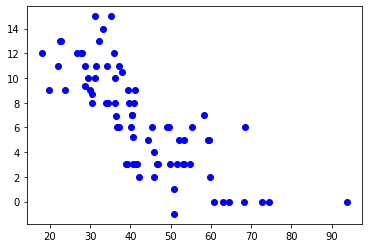

In [24]:
# Divide sugars by weight
sugars_adjusted = sugars_data / weight_data
print(sugars_adjusted)
plt.plot(rating_data,
         sugars_adjusted,
         c='b',
         linestyle='',
         marker='o')

#### Arithmetic with NumPy arrays

In [25]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr
arr * arr
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

In [26]:
1 / arr
arr ** 0.5

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

In [27]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
arr2
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

In [28]:
# What is the maximum and minimum amount of sugar in a unified serving?
print(np.max(sugars_adjusted))
print(np.min(sugars_adjusted[sugars_adjusted != -1]))

15.0
0.0


### Create our own ratings

- good-cereal-rating = protein + fiber + vitamins
- bad-cereal-rating = fat + sodium + potass + sugars

In [29]:
good_rating = data[:, 4].astype(float) + data[:, 7].astype(float) + data[:, 11].astype(float)
print(good_rating)

[ 39.    5.   38.   43.   28.   28.5  28.   30.   31.   33.   26.   33.
  26.   30.   26.   27.   28.   27.   26.   32.    4.   28.   29.   28.
  28.   27.   31.   33.   33.   26.   27.   26.   31.   31.   31.   27.
  29.5  26.  103.  105.   27.   31.   27.   29.   32.   32.   31.   29.
  27.   31.   31.   29.5  34.  104.    1.    3.   31.    7.7  33.   30.5
  29.   26.   27.    5.    7.    6.   28.   32.   30.  102.  107.  106.
  27.   26.   31.   31.   28. ]


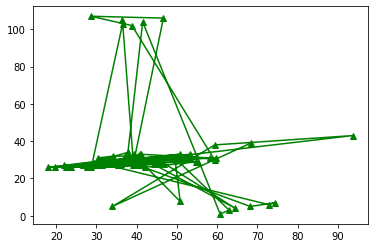

In [30]:
plt.plot(rating_data, good_rating, 'g-^') # b is color, . is marker

In [31]:
# mfr: manufacturer
# How many different mfr are there?
np.where(feature_names == "mfr")
set_mfr = set(data[:,1])
print(set_mfr)
len(set_mfr)

# How many products are made by mfr "Q"?
indices = np.where(data[:, 1] == "Q")
print(len(indices[0]))

# What are the products made by "Q"?
print(name_data[indices])

# How many products are there for each mfr?
for i in set_mfr:
    indices = np.where(data[:, 1] == i)
    print(i, len(indices[0])) 
    
# Actually, the frequencies can be obtain from np.unique
mfr, mfr_freq = np.unique(data[:, 1], return_counts=True)
print(mfr)
print(mfr_freq)

{'N', 'K', 'A', 'P', 'R', 'Q', 'G'}
8
['100% Natural Bran' "Cap'n'Crunch" 'Honey Graham Ohs' 'Life'
 'Puffed Rice' 'Puffed Wheat' 'Quaker Oat Squares' 'Quaker Oatmeal']
N 6
K 23
A 1
P 9
R 8
Q 8
G 22
['A' 'G' 'K' 'N' 'P' 'Q' 'R']
[ 1 22 23  6  9  8  8]


## More on NumPy Arrays
- Create a numpy array
- Change data type
- Arithmetic
- Boolean indexing
- Fancy indexing
- Reshape numpy arrays
- Element-wise array functions
- Statistical methods

In [32]:
# Create a numpy array
# 1. Array [6, 7.5, 8, 10.0]
array = np.array([6, 7.5, 8, 10.0])
print("array1:", array)
# 2. Array [[1, 2, 3, 4], [5, 6, 7, 8]]
array2 = np.array ([[1,2,3,4],[5,6,7,8]])
print("array\n",array2)
# 3. An array filled with 10 ones
array3 = np.ones(10)
print("array3")
print(array3)
# 4. A 3-by-6 2D array filled with zeros. np.zeros()
array4 = np.zeros(shape=(3,6))
print(array4)
# 5. Use np.arange() to create [0, ..., 99]
# array5 = np.arange(50, 100, 10)
array5 = np.arange(100)
print("array5")
print(array5)

# 6. Use np.arange() to create [1, 3, 5, 7, 9]
array6 = np.arange(1,10,2)
print(array6)

array1: [ 6.   7.5  8.  10. ]
array
 [[1 2 3 4]
 [5 6 7 8]]
array3
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
array5
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
[1 3 5 7 9]


In [33]:
# Data type
# Use np.random.rand() to create a 2*3 2D array of random numbers
array7 = np.random.rand(2, 3) # random numbers are sampled uniformly
                                # from [0, 1)
array8 = np.random.randn(2, 3) # sampled from Gaussian distribution
print(array7)
print(array8)

# draw 8 numbers randomly from [0, 10)
array9 = np.random.rand(8) * 10
print(array9)

# Simulate a sequence of 10 dice roll (numbers are randomly
# drawn from {1, 2, 3, 4, 5, 6})
print((np.random.rand(10) * 6).astype(int) + 1)
# ?np.random.randint()
print(np.random.randint(1, high=7, size=10))

# Find the data type of the array
print(array7.dtype)

# Convert the type to np.int32
print(array7.astype(int))

[[0.37696076 0.24831003 0.66649852]
 [0.73265016 0.56099919 0.03810157]]
[[ 0.62482429 -0.59358976 -0.67204022]
 [ 3.00045331  2.07544041  0.25339249]]
[7.9476336  7.87012655 6.50613251 5.30598433 1.7676846  3.06571009
 8.73712471 9.28604805]
[3 3 4 6 4 5 5 3 1 5]
[3 3 3 2 2 5 1 4 5 2]
float64
[[0 0 0]
 [0 0 0]]


In [34]:
# Array arithmetic
arr = np.array([[1., 2., 3.], [4., 5., 6.]])

print("arr * arr:\n", arr * arr)

print("arr - arr:\n", arr - arr)

print("arr > 3:\n", (arr > 3))

arr * arr:
 [[ 1.  4.  9.]
 [16. 25. 36.]]
arr - arr:
 [[0. 0. 0.]
 [0. 0. 0.]]
arr > 3:
 [[False False False]
 [ True  True  True]]


In [35]:
# Multiply two 2D arrays as matrices
mat1 = np.array([[1, 2, 3],
                 [4, 5, 6]])
mat2 = np.array([[7, 9],
                 [11, 13],
                 [15, 17]])
product = mat1.dot(mat2)
print(product)

[[ 74  86]
 [173 203]]


In [36]:
# Reshape numpy arrays
data = np.arange(12)
print(data)

# Reshape data to a 2*6 matrix
data = data.reshape([2, 6])
print(data)

data = data.reshape([3, 4])
print(data)
# Reshape data so that it has 4 rows
data = data.reshape([4, -1]) # -1 is a placeholder
print(data)

data = data.reshape([-1, 2])
print(data)

data = data.reshape(-1)
print(data)

# data = data.reshape([-1, -1]) # this gives an error
# Swap rows and columns
mat = np.array([[1, 5, 9],
                [2, 6, 10],
                [3, 7, 11],
                [4, 8, 12]])
# transpose the matrix
mat = mat.T
print(mat)
mat = mat.reshape(12)
print(mat)

[ 0  1  2  3  4  5  6  7  8  9 10 11]
[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [37]:
# Boolean indexing
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
print("name == 'Bob'\n", (names == 'Bob'))
where_bob = (names == 'Bob')
print(names[where_bob])

data = np.arange(28).reshape([7, 4])
print("data:\n", data)
print("data[names == 'Bob']\n", data[names == 'Bob'])

mask = ((names == 'Bob') | (names == 'Will'))
print("mask:\n", mask)
print("data[mask]:\n", data[mask])
print("data[~mask]:\n", data[~mask])

name == 'Bob'
 [ True False False  True False False False]
['Bob' 'Bob']
data:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]]
data[names == 'Bob']
 [[ 0  1  2  3]
 [12 13 14 15]]
mask:
 [ True False  True  True  True False False]
data[mask]:
 [[ 0  1  2  3]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]]
data[~mask]:
 [[ 4  5  6  7]
 [20 21 22 23]
 [24 25 26 27]]


In [38]:
# Fancy indexing
arr = np.arange(100).reshape([10, 10])
print(arr)
# Extract the following rows (keep the order): [4, 3, 0, 6]
rows = [4, 3, 0, 6]
sub_arr = arr[rows]
print(sub_arr)
# Extract the following columns (keep the order): [-3, -5, -7]
cols = [-3, -5, -7]
sub_arr = arr[:, cols]
print(sub_arr)
# Extract the intersection of the first 5 rows and first 5 columns
sub_arr = arr[[0,1,2,3,4],[0,1,2,3,4]]
print(sub_arr)
sub_arr = arr[:5][:, :5]
print(sub_arr)

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]
[[40 41 42 43 44 45 46 47 48 49]
 [30 31 32 33 34 35 36 37 38 39]
 [ 0  1  2  3  4  5  6  7  8  9]
 [60 61 62 63 64 65 66 67 68 69]]
[[ 7  5  3]
 [17 15 13]
 [27 25 23]
 [37 35 33]
 [47 45 43]
 [57 55 53]
 [67 65 63]
 [77 75 73]
 [87 85 83]
 [97 95 93]]
[ 0 11 22 33 44]
[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]]


In [39]:
# Create a list of 100 random number uniformly drawn between 0 and 1.
arr = np.random.rand(100)
print(arr)

# Compute the mean
mean = np.mean(arr)
print('Mean:', mean)

# Compute the sum
sum = np.sum(arr)
print(sum)

# Compute the standard deviation
std = np.std(arr)
print("Standard deviation:", std)

[0.18486563 0.29794913 0.22798815 0.66881272 0.22681886 0.75377853
 0.44903908 0.50279534 0.88014568 0.45929552 0.66938909 0.01237739
 0.18880379 0.40861061 0.8105684  0.67016456 0.33648196 0.68101297
 0.83649537 0.01937215 0.51326218 0.24375955 0.32612659 0.67894919
 0.14889815 0.00621352 0.39793938 0.76734508 0.75588422 0.92006235
 0.46900617 0.88000796 0.15469587 0.05283865 0.7535398  0.47993424
 0.52184431 0.86292578 0.20785248 0.50442008 0.95344616 0.05197265
 0.17919191 0.3720606  0.18526516 0.73423326 0.04689085 0.33249354
 0.0140044  0.22325518 0.39710851 0.6931164  0.82342101 0.1966639
 0.27014556 0.03060582 0.53770017 0.00630079 0.08481539 0.43361156
 0.8019263  0.90501225 0.02848637 0.37751376 0.51403306 0.45504029
 0.32282035 0.56719285 0.59157226 0.9183279  0.56928544 0.60881877
 0.51512894 0.99861514 0.58265249 0.28712444 0.02713248 0.28132282
 0.46408932 0.06866619 0.23064154 0.17308789 0.79298554 0.8355323
 0.00784944 0.53129083 0.27127556 0.51757856 0.98877218 0.692360

# Homework 2
1. Fat
    - Calculate fat per ounce 
    - What is the maximum and minimum value for fat per ounce?
2. Calories
    - Calculate calories per ounce
    - find the top 5 cereals with highest calories
    - find the top 5 cereals with lowest calories
3. Bad rating
    - Calculate bad-cereal-rating for each cereal
    - Plot Ratings vs. Bad-Cereal-Ratings.
    - Do they agree each other?